# Task 4.10 Part 1

## Content List:

- Import libraries
- ImportDataFrames for orders_products_customers_merged.pkl
- Address PII data
- Create Region Column
- Create exclusion flag for low-activity customers
- Export high_activity.pkl
- Customer Profiling
  - Age profile
    - visulisation for Age profile
    - Find Aggregate Variable
    - Compare Age profile with region
    - Compare Age profile with department
  - Income Profile
    - visulisation for income profile
    - Find Aggregate variable
    - Compare Income profile with region
    - Compare Income profile with department
  - Profiling based on number of dependants
    - visualisation for Role profile
    - Find Aggregate Variable
    - Compare Role profile with region
    - Compare Role profile with department
- Export df_merge_final.pkl

### Step 1

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Importing Dataframe

In [2]:
df_combined = pd.read_pickle('..\Prepared Data\ords_prods_customers_merged.pkl')

In [3]:
df_dept =pd.read_csv('..\Prepared Data\departments_wrangled.csv')

### Step 2

## Address PII Data

In [5]:
# Dropping first and last names
df =df_combined.drop(columns = ['First_name','Last_name'])

In [6]:
df.head()

,order_id,user_id,order_number,order_day_of_week,time_ordered,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_ordering,prior_ordering_flag,Gender,State,Age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,20.5,non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,20.5,non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,20.5,non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,20.5,non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,20.5,non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both


In [7]:
df.dtypes

order_id                     int64
user_id                      int64
order_number                 int64
order_day_of_week            int64
time_ordered                 int64
days_since_prior_order     float64
product_id                   int64
add_to_cart_order            int64
reordered                    int64
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
busiest_day                 object
Busiest_days                object
busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
mean_order                 float64
spending_flag               object
median_ordering            float64
prior_ordering_flag         object
Gender                      object
State                       object
Age                          int64
date_joined                 object
n_dependants                 int64
fam_status                  object
income              

### Step 3

## Creating Region Column

In [6]:
# Creating an empty container
region=[]
# Creating a "region" column based on the "state" column
for value in df['State']:
    if value in ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']:
        region.append('Northeast')
    elif value in ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']:
        region.append('Midwest')
    elif value in ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']:
        region.append('South')
    else:
        region.append('West')

In [7]:
df['region']=region

In [10]:
df ['region'].value_counts(dropna=False)

South        10801610
West          8300445
Midwest       7603810
Northeast     5728347
Name: region, dtype: int64

In [11]:
region

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 '

In [12]:
# Create a crosstab between 'region' and 'spending_flag'
region_spending = pd.crosstab(df['region'], df['spending_flag'], dropna = False)

In [13]:
# Check output
region_spending

spending_flag,Low spender,high spender
region,,
Midwest,7447681,156129
Northeast,5620004,108343
South,10591428,210182
West,8139638,160807


### Step 4

## Creating exclusion flag for low-activity customers

In [8]:
# Creating columns based on activity
df.loc[df['max_order']>=5,'activity_of_customer']='High order customer'
df.loc[df['max_order']<5,'activity_of_customer']='Low order customer'

In [14]:
# Checking
df['activity_of_customer'].value_counts(dropna=False)

High order customer    30992664
Low order customer      1441548
Name: activity_of_customer, dtype: int64

In [9]:
# Creating new dataframe excluding low-activity customers
df_high_activity=df[df['activity_of_customer']=='High order customer']

#### Exporting dataframe

In [4]:
df_high_activity.to_pickle('..\Prepared Data\df_high_activity.pkl')

In [5]:
df_high_activity =pd.read_pickle('..\Prepared Data\df_high_activity.pkl')

### Step 5 to 9

## Customer Profiling

#### Age profile

In [9]:
df.loc[df['Age'] >= 60,'Age_flag'] = 'Senior'
df.loc[(df['Age'] >= 45) & (df['Age'] < 60), 'Age_flag'] = 'Middle Age'
df.loc[(df['Age'] >= 26) & (df['Age'] < 45), 'Age_flag'] = 'Adult'
df.loc[df['Age'] < 26,'Age_flag'] = 'Young adult'

In [11]:
# Checking
df['Age_flag'].value_counts(dropna=False)

Senior         11077150
Adult           9653287
Middle Age      7654766
Young adult     4049009
Name: Age_flag, dtype: int64

In [14]:
df.head()

,order_id,user_id,order_number,order_day_of_week,time_ordered,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,State,Age,date_joined,n_dependants,fam_status,income,_merge,region,activity_of_customer,Age_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Alabama,31,2/17/2019,3,married,40423,both,South,High order customer,Adult
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,both,South,High order customer,Adult
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,both,South,High order customer,Adult
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,both,South,High order customer,Adult
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,both,South,High order customer,Adult


In [25]:
df_high_activity.head()

,order_id,user_id,order_number,order_day_of_week,time_ordered,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Gender,State,Age,date_joined,n_dependants,fam_status,income,_merge,region,activity_of_customer
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High order customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High order customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High order customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High order customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High order customer


In [ ]:
# Visualisation for Age Profile

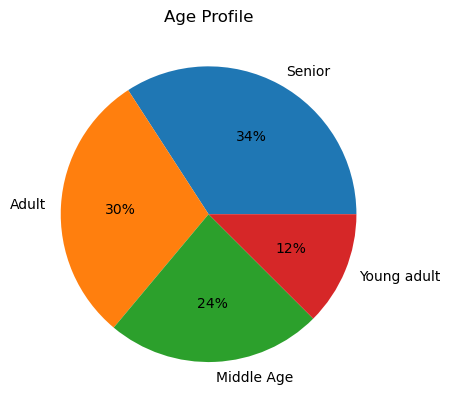

In [21]:
# Create a pie chart for 'age_flag'
pie_chart_age_profile = df['Age_flag'].value_counts().plot.pie(title = 'Age Profile', label = '', autopct = ('%1.f%%'))

In [ ]:
# Export pie_chart_age
pie_chart_age_profile.figure.savefig('..\Analysis\Visualisations\pie_chart_age_profile')

In [ ]:
# Find aggregate variables

In [20]:
Age_agg = df.groupby('Age_flag').agg({'days_since_prior_order': ['min', 'max', 'mean'], 'prices': ['min', 'max', 'mean', 'sum']})

In [23]:
Age_agg

days_since_prior_order                  prices           \
                               min   max       mean    min      max   
Age_flag                                                              
Adult                          0.0  30.0  11.113299    1.0  99999.0   
Middle Age                     0.0  30.0  11.114884    1.0  99999.0   
Senior                         0.0  30.0  11.092861    1.0  99999.0   
Young adult                    0.0  30.0  11.093003    1.0  99999.0   

                                     
                  mean          sum  
Age_flag                             
Adult        11.850462  114395908.3  
Middle Age   12.356454   94585764.8  
Senior       11.764519  130317343.1  
Young adult  12.175805   49299945.8

In [ ]:
# Compare Age profile with region

In [24]:
# Create crosstab between age and region
crosstab_age_region = pd.crosstab(df['region'], df['Age_flag'], dropna = False)

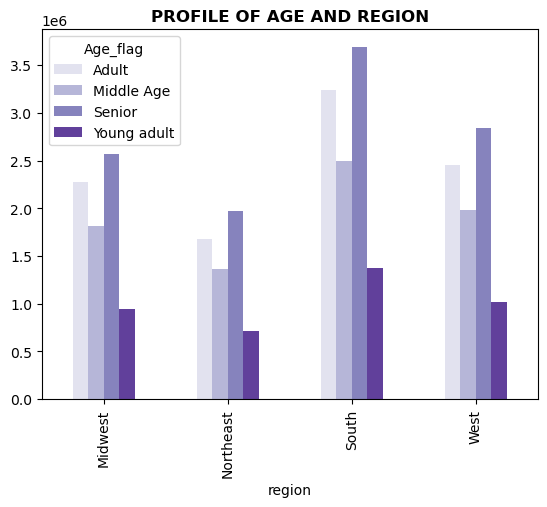

In [25]:
# Creating a bar chart between age and region
bar_age_and_region = crosstab_age_region.plot.bar(color=sns.color_palette('Purples',4))
plt.title('PROFILE OF AGE AND REGION', fontweight='bold')
plt.show()

In [ ]:
# Export bar_age_region
bar_age_and_region.figure.savefig('..\Analysis\Visualisations\bar_chart_age_profile_region')

In [ ]:
# Compare age profile with departments

In [14]:
df_dept.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [10]:
# Rename 'Unnamed: 0' column as 'department_id'
df_dept.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [11]:
df_dept.head() 

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [12]:
#creating a subset
df_high_act= df_high_activity[:1000000]

In [13]:
df = df[:1000000]

In [21]:
df_merge = df.merge(df_dept, on = 'department_id')

In [22]:
df_merge.head()

,order_id,user_id,order_number,order_day_of_week,time_ordered,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,State,Age,date_joined,n_dependants,fam_status,income,_merge,region,Age_flag,department
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Alabama,31,2/17/2019,3,married,40423,both,South,Adult,beverages
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,both,South,Adult,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,both,South,Adult,beverages
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,both,South,Adult,beverages
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,both,South,Adult,beverages


In [23]:
# Create crosstab between age and departments
crosstab_Age_departments = pd.crosstab(df_merge['department'], df['Age_flag'], dropna = False)

In [24]:
crosstab_Age_departments

Age_flag,Adult,Middle Age,Senior,Young adult
department,,,,
alcohol,3656,3520,5264,1661
babies,1244,1498,2736,514
bakery,12247,7282,15682,4730
beverages,49340,37043,56346,26219
breakfast,6810,8994,11309,4467
bulk,646,266,312,0
canned goods,6854,5971,9088,2429
dairy eggs,44784,28891,41614,16974
deli,6695,6286,7760,834


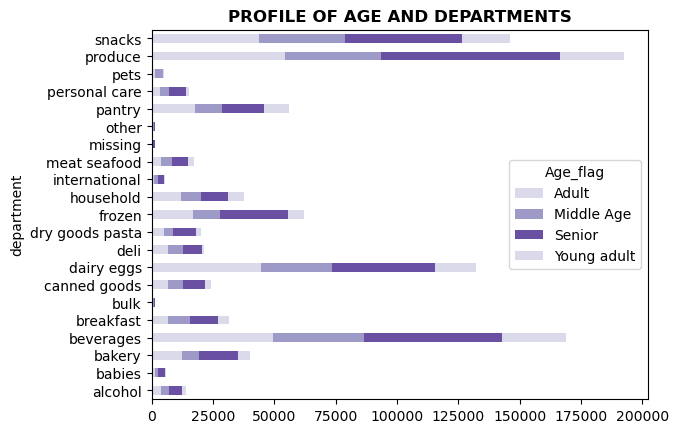

In [25]:
# Creating a stacked bar chart between age and department
stacked_bar_Age_and_dept=crosstab_Age_departments.plot.barh(stacked=True,color=sns.color_palette('Purples',3))
plt.title('PROFILE OF AGE AND DEPARTMENTS', fontweight='bold')
plt.show()

In [26]:
#Export
stacked_bar_Age_and_dept.figure.savefig('..\Analysis\Visualisations\stacked_bar_age_department')

### Income profiling

In [27]:
# Creating income profile
df.loc[df['income']<=50000,'income_flag']='Low income'
df.loc[(df['income']>50000) & (df['income']<=100000),'income_flag']='Middle income'
df.loc[df['income']>100000,'income_flag']='High income'

In [28]:
# Checking
df['income_flag'].value_counts(dropna=False)

High income      388667
Middle income    374796
Low income       236537
Name: income_flag, dtype: int64

In [29]:
df.head()

,order_id,user_id,order_number,order_day_of_week,time_ordered,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Gender,State,Age,date_joined,n_dependants,fam_status,income,_merge,Age_flag,income_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,Adult,Low income
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,Adult,Low income
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,Adult,Low income
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,Adult,Low income
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,Adult,Low income


In [ ]:
# Visualization for income profile

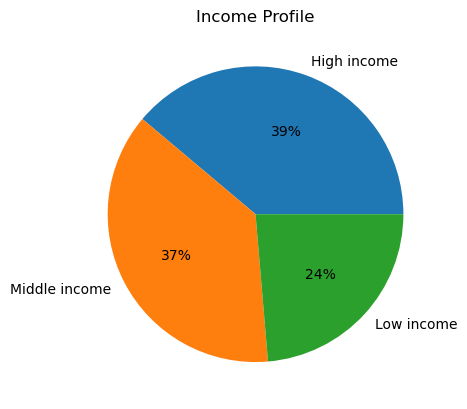

In [30]:
pie_chart_income = df['income_flag'].value_counts().plot.pie(title = 'Income Profile', label = '', autopct = ('%1.f%%'))

In [31]:
# Export pie chart
pie_chart_income.figure.savefig(os.path.join('..\04 Analysis\Visualisations\pie_chart_income_profile')

In [ ]:
# Find aggregate variables

In [32]:
income_agg = df.groupby('income_flag').agg({'days_since_prior_order': ['min', 'max', 'mean'], 'prices': ['min', 'max', 'mean', 'sum']})

In [33]:
income_agg

days_since_prior_order                  prices           \
                                 min   max       mean    min      max   
income_flag                                                             
High income                      0.0  30.0  10.137940    1.0  99999.0   
Low income                       0.0  30.0  10.090333    1.0     25.0   
Middle income                    0.0  30.0  10.163013    1.0  99999.0   

                                      
                    mean         sum  
income_flag                           
High income    31.953589  12419305.7  
Low income      6.353674   1502879.1  
Middle income   8.345930   3128021.1

In [ ]:
# Compare income profile with region

In [37]:
# Creating a crosstab between income and region
income_and_region=pd.crosstab(df['region'],df['income_flag'],dropna=False)

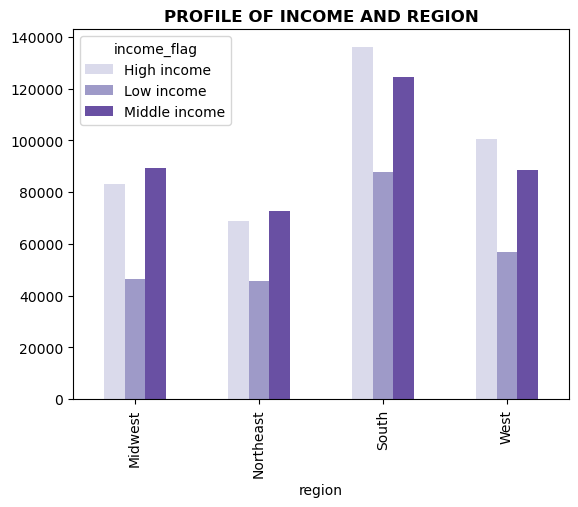

In [38]:
# Creating a bar chart between income and region
bar_income_and_region=income_and_region.plot.bar(color=sns.color_palette('Purples',3))
plt.title('PROFILE OF INCOME AND REGION', fontweight='bold')
plt.show()

In [39]:
# Export bar graph
bar_income_and_region.figure.savefig('..\04 Analysis\Visualisations\bar_income_region')

In [ ]:
# Compare income profile with departments

In [28]:
# Creating a crosstab between income and department
income_and_dept=pd.crosstab(df_merge['department'],df['income_flag'],dropna=False)

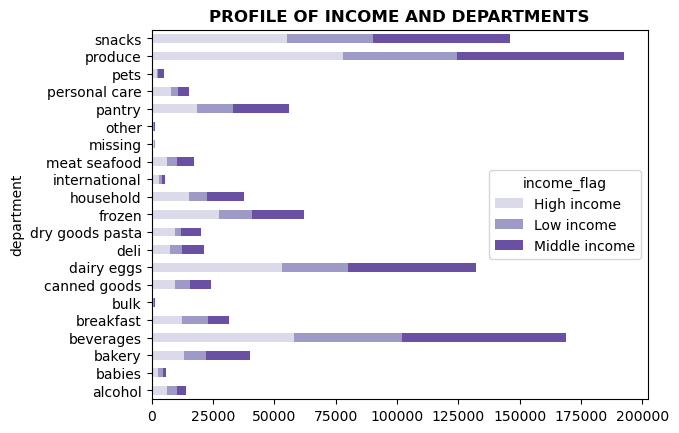

In [29]:
# creating a stacked bar chart
stacked_bar_income_and_dept = income_and_dept.plot.barh(stacked=True,color=sns.color_palette('Purples',3))
plt.title('PROFILE OF INCOME AND DEPARTMENTS', fontweight='bold')
plt.show()

In [30]:
# Export stacked bar chart
stacked_bar_income_and_dept.figure.savefig('..\Analysis\Visualisations\stacked_bar_income_dept')

### Profiling based on number of dependants

In [31]:
# Create role_flag
df.loc[df['n_dependants'] == 0, 'role_flag'] = 'Single'
df.loc[df['n_dependants'] != 0, 'role_flag'] = 'Family'

In [43]:
# Check value counts
df['role_flag'].value_counts(dropna = False)

Family    751538
Single    248462
Name: role_flag, dtype: int64

In [32]:
df.head()

,order_id,user_id,order_number,order_day_of_week,time_ordered,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Age,date_joined,n_dependants,fam_status,income,_merge,region,Age_flag,income_flag,role_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,31,2/17/2019,3,married,40423,both,South,Adult,Low income,Family
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,both,South,Adult,Low income,Family
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,both,South,Adult,Low income,Family
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,both,South,Adult,Low income,Family
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,both,South,Adult,Low income,Family


In [ ]:
# visualisation for profiling number of depandants

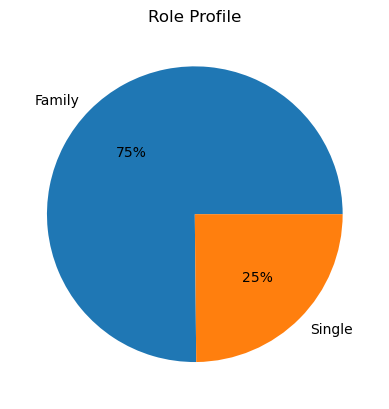

In [33]:
# Create a pie chart for 'role_flag'
pie_chart_role = df['role_flag'].value_counts().plot.pie(title = 'Role Profile', label = '', autopct = ('%1.f%%'))

In [34]:
# Export pie chart
pie_chart_role.figure.savefig('..\Analysis\Visualisations\pie_chart_role_profile')

In [ ]:
# Find aggregate variables

In [47]:
Role_flag_agg = df.groupby('role_flag').agg({'days_since_prior_order': ['min', 'max', 'mean'], 'prices': ['min', 'max', 'mean', 'sum']})

In [48]:
Role_flag_agg

days_since_prior_order                  prices                      \
                             min   max       mean    min      max       mean   
role_flag                                                                      
Family                       0.0  30.0  10.159088    1.0  99999.0  15.836868   
Single                       0.0  30.0  10.066235    1.0  99999.0  20.720262   

                       
                  sum  
role_flag              
Family     11902008.1  
Single      5148197.8

In [ ]:
# Compare role profile with region

In [35]:
# Creating a crosstab between dependants and region
dependants_and_region=pd.crosstab(df['region'],df['role_flag'],dropna=False)

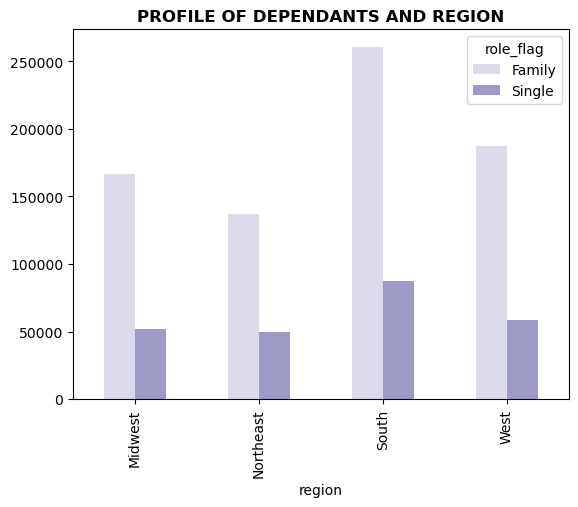

In [36]:
# Creating a bar chart between dependants and region
bar_dependants_and_region=dependants_and_region.plot.bar(color=sns.color_palette('Purples',3))
plt.title('PROFILE OF DEPENDANTS AND REGION', fontweight='bold')
plt.show()

In [ ]:
# Export bar graph
bar_dependants_and_region.figure.savefig('..\Analysis\Visualisations\bar_role_region')

In [ ]:
# Compare role profile with departments

In [39]:
# Create crosstab between role and departments
crosstab_role_departments = pd.crosstab(df_merge['department'], df['role_flag'], dropna = False)

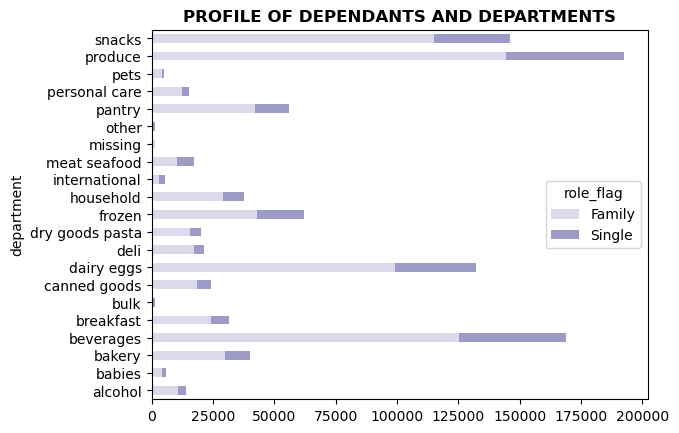

In [40]:
# Creating a stacked bar chart between dependants and department
stacked_bar_dependants_and_dept=crosstab_role_departments.plot.barh(stacked=True,color=sns.color_palette('Purples',3))
plt.title('PROFILE OF DEPENDANTS AND DEPARTMENTS', fontweight='bold')
plt.show()

In [42]:
# Export stacked bar chart
stacked_bar_dependants_and_dept.figure.savefig('..\Analysis\Visualisations\stacked_bar_role_dept')

## Export df_merge

In [44]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 33 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   order_id                1000000 non-null  int64   
 1   user_id                 1000000 non-null  int64   
 2   order_number            1000000 non-null  int64   
 3   order_day_of_week       1000000 non-null  int64   
 4   time_ordered            1000000 non-null  int64   
 5   days_since_prior_order  950303 non-null   float64 
 6   product_id              1000000 non-null  int64   
 7   add_to_cart_order       1000000 non-null  int64   
 8   reordered               1000000 non-null  int64   
 9   product_name            998410 non-null   object  
 10  aisle_id                1000000 non-null  int64   
 11  department_id           1000000 non-null  int64   
 12  prices                  1000000 non-null  float64 
 13  busiest_day             1000000 non-null  o

In [45]:
df_merge.to_pickle('..\Prepared Data\df_merge_final.pkl')